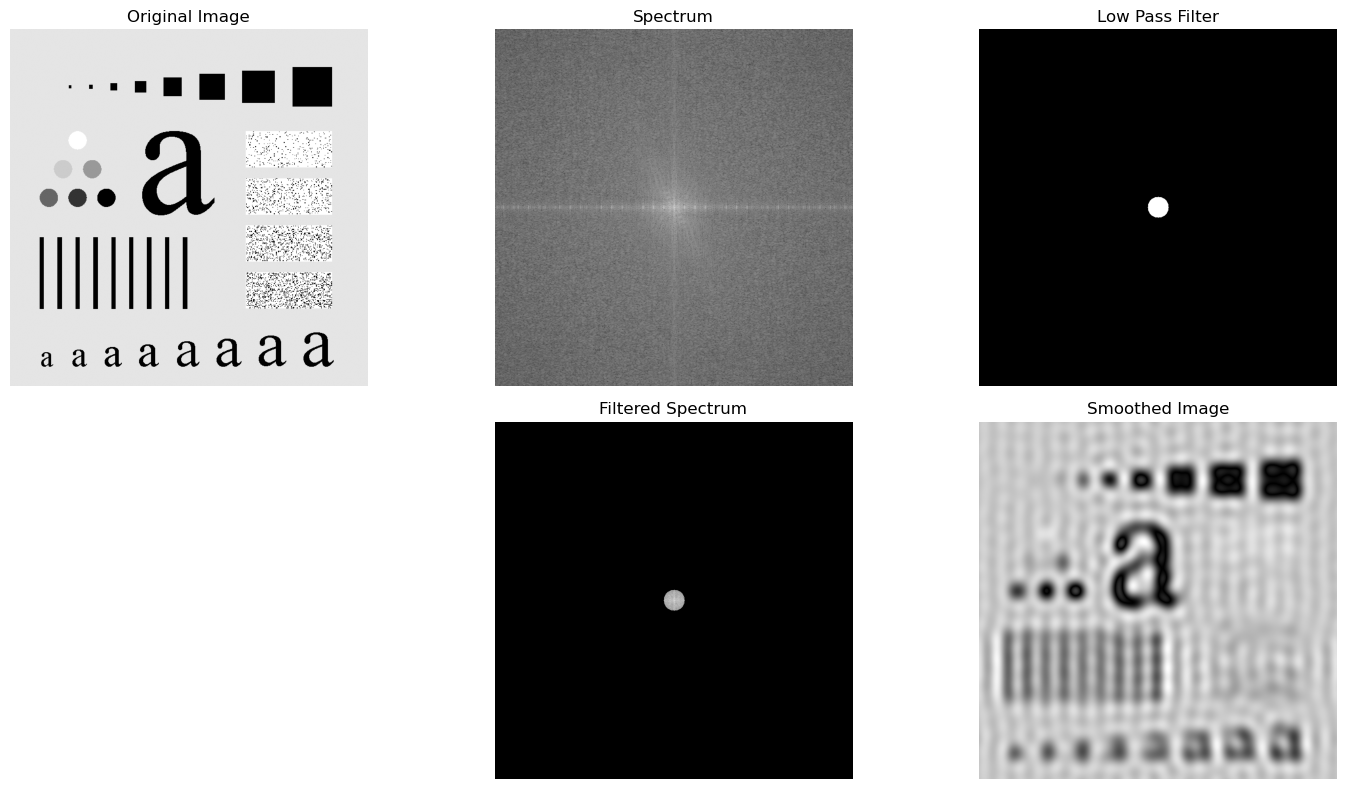

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import sqrt

# Distance function
def distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Create Ideal Low Pass Filter (ILPF)
def ideal_low_pass_filter(shape, D0):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols))

    for y in range(rows):
        for x in range(cols):
            if distance((y, x), center) <= D0:
                filter_mask[y, x] = 1
    return filter_mask

# Load grayscale image
image_path = r"C:/Users/gaura/Downloads/character (1).tif"
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# FFT (Forward Fourier Transform) and shift zero freq to center
fft_image = np.fft.fft2(img_array)
fft_centered = np.fft.fftshift(fft_image)

# Design Low Pass Filter
D0 = 20  # Cut-off frequency
lp_filter = ideal_low_pass_filter(img_array.shape, D0)

# Apply filter
filtered_center = fft_centered * lp_filter

# Inverse FFT to get back image
ifft_centered = np.fft.ifftshift(filtered_center)
filtered_img = np.fft.ifft2(ifft_centered)
filtered_img = np.abs(filtered_img)

# Plot all results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.log(1 + np.abs(fft_centered)), cmap='gray')
plt.title('Spectrum')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(lp_filter, cmap='gray')
plt.title('Low Pass Filter')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.log(1 + np.abs(filtered_center)), cmap='gray')
plt.title('Filtered Spectrum')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(filtered_img, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


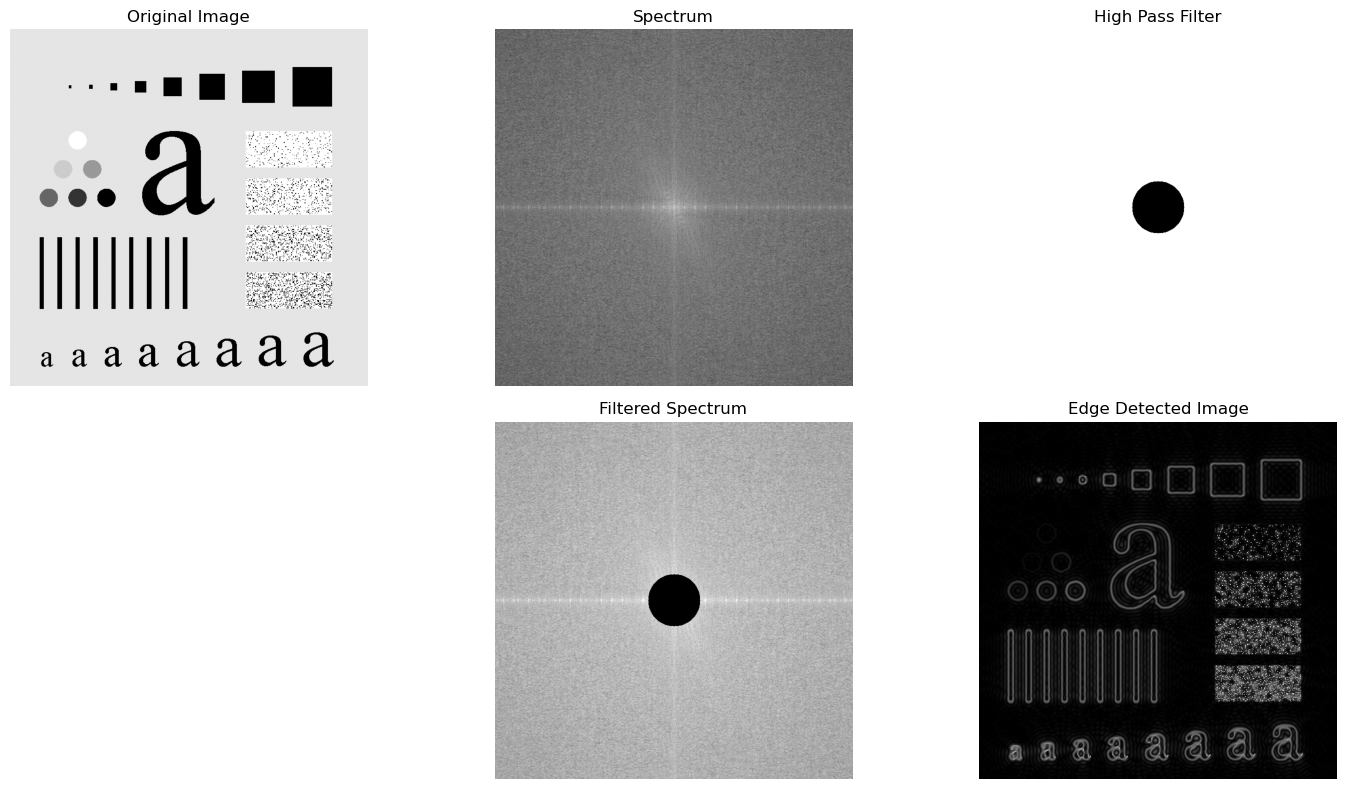

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import sqrt

# Distance function
def distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Create Ideal High Pass Filter (IHPF)
def ideal_high_pass_filter(shape, D0):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.ones((rows, cols))

    for y in range(rows):
        for x in range(cols):
            if distance((y, x), center) <= D0:
                filter_mask[y, x] = 0
    return filter_mask

# Load grayscale image
image_path = r"C:/Users/gaura/Downloads/character (1).tif"
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# FFT and shift
fft_image = np.fft.fft2(img_array)
fft_centered = np.fft.fftshift(fft_image)

# Design High Pass Filter
D0 = 50  # Cut-off frequency
hp_filter = ideal_high_pass_filter(img_array.shape, D0)

# Apply filter
filtered_center = fft_centered * hp_filter

# Inverse FFT
ifft_centered = np.fft.ifftshift(filtered_center)
filtered_img = np.fft.ifft2(ifft_centered)
filtered_img = np.abs(filtered_img)

# Plot all results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.log(1 + np.abs(fft_centered)), cmap='gray')
plt.title('Spectrum')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(hp_filter, cmap='gray')
plt.title('High Pass Filter')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.log(1 + np.abs(filtered_center)), cmap='gray')
plt.title('Filtered Spectrum')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(filtered_img, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.tight_layout()
plt.show()


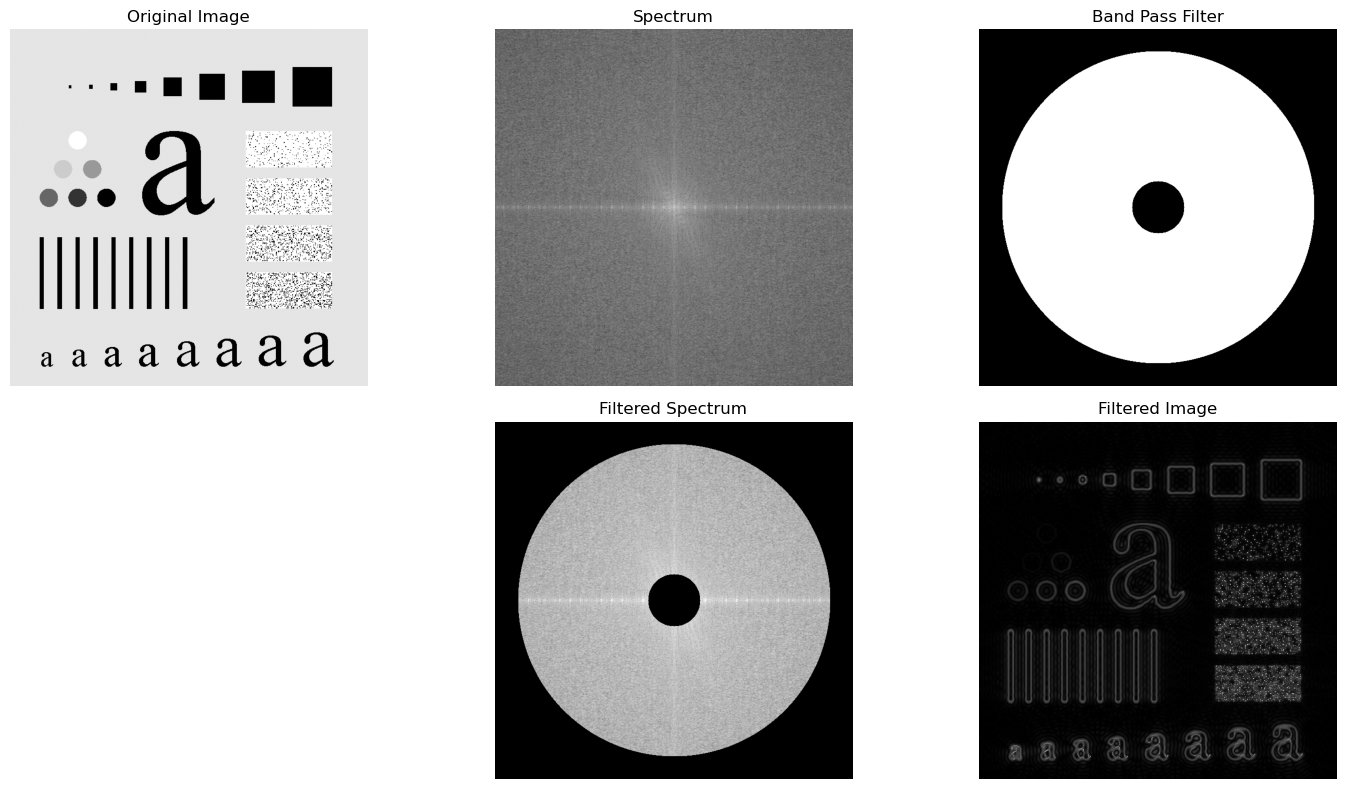

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import sqrt

# Distance function
def distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Ideal Band Pass Filter function
def ideal_band_pass_filter(shape, D0, D1):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    filter_mask = np.zeros((rows, cols))

    for y in range(rows):
        for x in range(cols):
            d = distance((y, x), center)
            if D0 < d < D1:
                filter_mask[y, x] = 1
    return filter_mask

# Load grayscale image
img_path = r"C:/Users/gaura/Downloads/character (1).tif"
img = Image.open(img_path).convert('L')
img_array = np.array(img)

# FFT and shift
fft_img = np.fft.fft2(img_array)
fft_centered = np.fft.fftshift(fft_img)

# Create Band Pass Filter
D0, D1 = 50, 300
bp_filter = ideal_band_pass_filter(img_array.shape, D0, D1)

# Apply filter
filtered_centered = fft_centered * bp_filter

# Inverse FFT
ifft_centered = np.fft.ifftshift(filtered_centered)
filtered_img = np.fft.ifft2(ifft_centered)
filtered_img = np.abs(filtered_img)

# Plotting
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.log(1 + np.abs(fft_centered)), cmap='gray')
plt.title('Spectrum')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(bp_filter, cmap='gray')
plt.title('Band Pass Filter')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.log(1 + np.abs(filtered_centered)), cmap='gray')
plt.title('Filtered Spectrum')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
